In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv('mooddata.csv')

In [ ]:
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
17994,i can feel its suffering,0
17995,i just keep feeling like someone is being unki...,3
17996,im feeling a little cranky negative after this...,3
17997,i feel that i am useful to my people and that ...,1


In [ ]:
df['label'].unique()

array([0, 3, 2, 5, 4, 1])

In [ ]:
df['label'].value_counts()

1    6057
0    5247
3    2434
4    2160
2    1463
5     638
Name: label, dtype: int64

<Axes: >

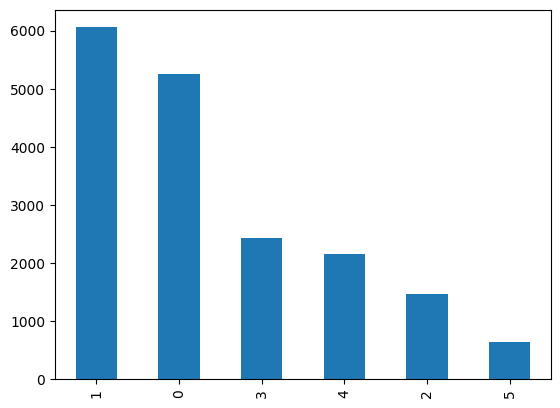

In [ ]:
df['label'].value_counts().plot(kind = 'bar')

In [ ]:
def neater(prompt):
    #remove white space from prompt
    prompt = prompt.strip()

    words = prompt.split()

    punctuation = ['!', '"', '#', '$', '%', '&', "'", '(', ')',
     '*', '+', ',', '-', '.', '/', ':', ';', '<',
       '=', '>', '?', '[', '\\', ']', '^', '_',
       '`', '{', '|', '}', '~']

    for i in range(len(words)):
        if words[i].startswith('@'):
            words[i] = ''
        else:
            for char in words[i]:
                if char in punctuation:
                    words[i] = words[i].replace(char, '')

    prompt = ' '.join(words)

    return prompt

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  result = ""
  if sentiment>0:
    result = "Positive"
  elif sentiment<0:
    result = "Negative"
  else:
    result = "Neutral"
  return result, sentiment

In [ ]:
X = df['text']
y = df['label']

In [ ]:
X

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
17994                             i can feel its suffering
17995    i just keep feeling like someone is being unki...
17996    im feeling a little cranky negative after this...
17997    i feel that i am useful to my people and that ...
17998    im feeling more comfortable with derby i feel ...
Name: text, Length: 17999, dtype: object

In [ ]:
y

0        0
1        0
2        3
3        2
4        3
        ..
17994    0
17995    3
17996    3
17997    1
17998    1
Name: label, Length: 17999, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                  test_size=0.2, random_state=3)
print(df.shape)
print('---------')
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print('---------')
print(y.shape)
print(y_test.shape)
print(y_train.shape)

(17999, 2)
---------
(17999,)
(14399,)
(3600,)
---------
(17999,)
(3600,)
(14399,)


In [ ]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english')
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
X_train

8356     i have the feeling in my mind that a person ge...
15656            id feel nostalgic about gillard hours ago
15794    i feel that i am too distracted to do well on ...
868      i couldn t turn my head away even when i feel ...
15283    when reading a newspaper story of a man who ha...
                               ...                        
6400           im feeling groggy and having a bad skin day
15288    i did not feel inhibited by the fact that the ...
11513    i feel like you have so be pretty self assured...
1688     i like when im feeling productive even though ...
5994     i feel my connection with the divine most stro...
Name: text, Length: 14399, dtype: object

In [ ]:
X_train_features

<14399x14017 sparse matrix of type '<class 'numpy.float64'>'
	with 117417 stored elements in Compressed Sparse Row format>

In [ ]:
model = LogisticRegression()
model.fit(X_train_features, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred = model.predict(X_train_features)
accuracy = accuracy_score(y_train, pred)

In [ ]:
accuracy

0.9470102090422946

In [ ]:
def input_text(text):
  input_data_features = feature_extraction.transform(text)
  final_prediction = model.predict(input_data_features)
  res = ''
  score = final_prediction[0]
  if score==0:
    res = 'sad'
  elif score==1:
    res='happy'
  elif score==2:
    res = 'love'
  elif score==3:
    res='anger'
  elif score==4:
    res = 'fear'
  return res

In [ ]:
input_text(['I am very happy today'])

'happy'

In [ ]:
input_text(['I am very sad today'])

'sad'

In [ ]:
input_text(['I am very scared about going to prison today'])

'fear'

In [ ]:
input_text(['I was so mad at my employee for forking so terrific'])

'anger'

In [ ]:
import joblib
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(feature_extraction, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']